# Import Libraries

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Importing the Solubility Dataset

In [2]:
url='https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv'
df = pd.read_csv(url)
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [3]:
df.describe()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,2.449133,204.631675,2.173951,0.364932,-3.057997
std,1.866003,102.620500,2.627398,0.343305,2.096502
min,-7.571400,16.043000,0.000000,0.000000,-11.600000
25%,1.414900,122.126000,0.000000,0.000000,-4.332250
50%,2.340300,183.594500,1.000000,0.375000,-2.870500
75%,3.406475,270.715750,3.000000,0.666667,-1.600000
max,10.388600,780.949000,23.000000,1.000000,1.580000


# Dividing the Data into Dependent and Independent Features

In [4]:
X= df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [5]:
print(X)

[[  2.5954     167.85         0.           0.        ]
 [  2.3765     133.405        0.           0.        ]
 [  2.5938     167.85         1.           0.        ]
 ...
 [  3.6096     308.333        4.           0.69565217]
 [  2.56214    354.815        3.           0.52173913]
 [  2.02164    179.219        1.           0.46153846]]


In [6]:
print(y)

[-2.18  -2.    -1.74  ... -3.893 -3.79  -2.581]


# Data Preprocessing

# Checking for missing Data

In [7]:
df.isnull().sum()

MolLogP               0
MolWt                 0
NumRotatableBonds     0
AromaticProportion    0
logS                  0
dtype: int64

# Exploratory Data Analysis

# Feature Scaling

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(len(y),1))

# Splitting Data into Training and Test Dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Training Data using Random Forest Regressor

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Predictions on Test Dataset

In [11]:
y_pred=model.predict(X_test)
y_pred

array([[ 7.24773456e-01],
       [-1.44345443e+00],
       [-1.06211917e+00],
       [-1.04726581e-01],
       [ 6.46496234e-01],
       [-1.22814355e+00],
       [ 7.75726694e-01],
       [ 1.49148771e-01],
       [-1.78826904e-01],
       [-3.49536691e-01],
       [ 8.53773111e-01],
       [ 7.20268747e-01],
       [-3.17136525e-01],
       [-9.62133003e-02],
       [-3.36636268e-01],
       [ 4.41319878e-01],
       [ 5.03123102e-01],
       [-8.35225524e-01],
       [ 7.74088136e-01],
       [ 1.16631871e-01],
       [ 3.24155268e-01],
       [ 7.66941439e-01],
       [-3.11361661e-01],
       [-1.71279578e-03],
       [ 9.20723734e-01],
       [ 9.29537416e-01],
       [ 2.87427922e-01],
       [-9.42883024e-01],
       [-1.11129999e-01],
       [-5.53699815e-01],
       [ 2.86150876e-01],
       [-1.62287969e-02],
       [-4.00494551e-01],
       [ 5.75453825e-01],
       [ 4.20113805e-01],
       [-1.41126394e+00],
       [ 9.51075301e-01],
       [ 3.37511762e-01],
       [ 6.3

# Model Performance

In [12]:
print('Mean squared error (MSE): '+ str(mean_squared_error(y_test, y_pred)))
print('R Squared: ' + str(r2_score(y_test, y_pred)))

Mean squared error (MSE): 0.22750526771752014
R Squared: 0.7705650058569231


# Data Visualization

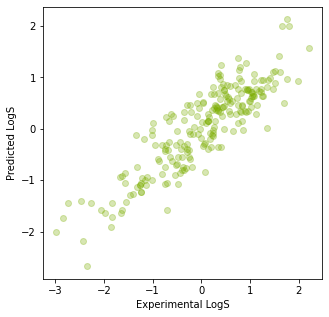

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test,y=y_pred,c="#7CAE00",alpha=0.3)
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')
plt.show()

# Save the Model

In [14]:
pickle.dump(model,open('solubility_model.pkl','wb'))